## 利用梯度大小推断相关度

归因分析技术

In [36]:
import torch
import numpy
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display
from torch.utils.data import DataLoader
from torchvision import datasets
from torch import tensor, nn
from torchvision.transforms import ToTensor
%matplotlib inline

In [37]:
trainData = datasets.MNIST(
    root = "../Database",
    train = True,
    download = False,
    transform = ToTensor(),
)

dataSet = DataLoader(trainData,  shuffle = True)

In [38]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 8, 3, 1, 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 16, 3, 1, 1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.cls = nn.Sequential(
            nn.Linear(16 * 7 * 7, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, inputImg):
        batchSize = inputImg.size(0)

        # maxpooling 下采样, h, w 减半
        x = self.conv1(inputImg)
        assert x.shape == (batchSize, 8, 14, 14), "Shape Error"

        x = self.conv2(x)
        assert x.shape == (batchSize, 16, 7, 7), "Shape Error"

        x = x.reshape(batchSize, -1)
        x = self.cls(x)
        return x

In [39]:
model = Network()
optimizer = torch.optim.AdamW(model.parameters(), lr =  3e-3)
LossFunction = nn.CrossEntropyLoss()

In [40]:
history = {
    'loss':[]
}

for i in range(5):
    eopchLoss = 0.
    for index, data in enumerate(dataSet):
        img, label = data
        
        prediction = model(img)
        loss = LossFunction(prediction, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if index % 1000 == 0:
            print("Epoch: {}, Index: {}, Loss: {}".format(i, index, loss.item()))
            torch.save(model.state_dict(), '../SavedModel/CNN/MNISTLE.pth')
        if index > 10000:
            break
        eopchLoss += loss.item()
    history['loss'].append(eopchLoss)
    display.clear_output()
    break

Epoch:0, Index0, Loss2.4062211513519287
Epoch:0, Index1000, Loss4.925690650939941
Epoch:0, Index2000, Loss0.0014835315523669124
Epoch:0, Index3000, Loss4.937036991119385
Epoch:0, Index4000, Loss0.0004864939546678215
Epoch:0, Index5000, Loss0.08813183009624481
Epoch:0, Index6000, Loss0.0021360930986702442
Epoch:0, Index7000, Loss0.013731422834098339
Epoch:0, Index8000, Loss0.000402250443585217
Epoch:0, Index9000, Loss0.0002383901592111215
Epoch:0, Index10000, Loss0.0003328961320221424


AttributeError: 'dict' object has no attribute 'append'

In [46]:
model = Network()
model.load_state_dict(torch.load('../SavedModel/CNN/MNISTLE.pth'))
# model.eval()

<All keys matched successfully>

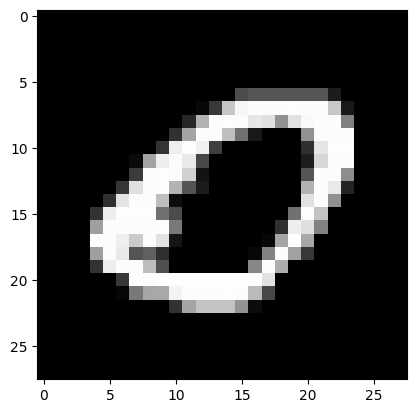

In [47]:
img, label = trainData[1]
plt.imshow(img.transpose(0, 2), cmap = 'gray')
img = img.unsqueeze(0)

In [50]:
prediction = model(img)
loss = LossFunction(prediction, tensor([label]))
loss.backward()

In [56]:
for p in model.conv1.parameters():
    print(p)

Parameter containing:
tensor([[[[ 0.1106, -0.3270, -0.3046],
          [ 0.0869, -0.1525,  0.2895],
          [ 0.1068,  0.0417,  0.2504]]],


        [[[-0.5324,  0.2282,  0.5367],
          [-0.0388,  0.1434,  0.0590],
          [ 0.1016, -0.1549,  0.1556]]],


        [[[ 0.2574,  0.2072,  0.0667],
          [-0.3605, -0.2258,  0.3402],
          [-0.4360, -0.0507,  0.3621]]],


        [[[ 0.0700, -0.4419, -0.8311],
          [ 0.1333, -0.0695, -0.2870],
          [ 0.4066,  0.3826,  0.0632]]],


        [[[ 0.5618, -0.4319, -0.6912],
          [-0.0775, -0.3059, -0.3567],
          [-0.3509, -0.4049, -0.4526]]],


        [[[-0.1576,  0.0383, -0.1004],
          [-0.0892, -0.0440, -0.1786],
          [ 0.0380,  0.0591,  0.0657]]],


        [[[ 0.0622,  0.3125,  0.2090],
          [ 0.2140,  0.2164,  0.1320],
          [-0.2039,  0.2356,  0.0715]]],


        [[[ 0.0223,  0.4653,  0.4312],
          [-0.1083,  0.1763, -0.1251],
          [-0.5054, -0.7925, -0.4081]]]], requires_gr